In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from time import time
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/user/Feature_Selection/data/MT/DB6Tr.csv", sep=",", header=0)
df.head()

,T,T1,T2,T3,TVO2,TVCO,P,xCO2,xCO,xO2,xO,xC,Viscosity
0,6000.0,4000.0,2000.0,4000.0,4000.0,4000.0,101320.0,0.6,0.2,0.6,0.2,0.2,0.000150
1,16000.0,14000.0,12000.0,12000.0,14000.0,12000.0,101320.0,0.4,0.2,0.8,0.8,1.0,0.000344
2,20000.0,16000.0,18000.0,16000.0,16000.0,16000.0,101320.0,0.6,0.4,0.8,1.0,0.4,0.000388
3,12000.0,10000.0,8000.0,8000.0,10000.0,10000.0,101320.0,0.2,0.6,0.6,0.8,0.8,0.000283
4,16000.0,14000.0,14000.0,12000.0,12000.0,14000.0,101320.0,0.2,0.6,0.2,1.0,1.0,0.000369


In [3]:
df.shape


(67200, 13)

In [4]:
df.columns

Index(['T', 'T1', 'T2', 'T3', 'TVO2', 'TVCO', 'P', 'xCO2', 'xCO', 'xO2', 'xO',
       'xC', 'Viscosity'],
      dtype='object')

In [5]:
X = df.iloc[:, :12].values 
y = df.iloc[:,12:].values 

In [6]:
X.shape


(67200, 12)

In [7]:
y.shape


(67200, 1)

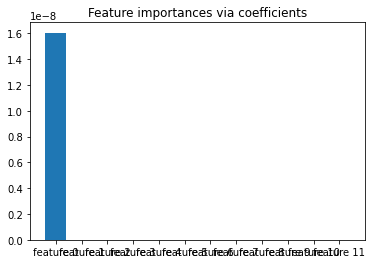

[1.6058143e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]


In [8]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

lasso = LassoCV().fit(X, y.ravel())
importance = np.abs(lasso.coef_)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()
print(importance)

In [9]:
threshold = np.sort(importance)[-3] + .01 # check/modify these values

tic = time()
sfm = SelectFromModel(estimator=lasso, threshold=threshold).fit(X, y.ravel())
toc = time()
#print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

print(sfm.estimator_.coef_)
print(sfm.threshold_)
print(sfm.get_support)
print(sfm.transform(X))

Done in 0.378s
[ 1.6058143e-08  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -0.0000000e+00
  0.0000000e+00 -0.0000000e+00  0.0000000e+00  0.0000000e+00]
0.01
<bound method SelectorMixin.get_support of SelectFromModel(estimator=LassoCV(), threshold=0.01)>
[]


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"
